In [4]:
## We have used Python for Exploring the data and to find some meaningful interaction term for the regression model
## Adding the packages for Exploratory Data Analysis
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

In [5]:
## importing the dataset in to the python environment
data = pd.read_csv('online_shoppers_intention.csv')
data ## The data is imported below

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [6]:
pur_prob = data['Revenue'].value_counts()  ## Counting the number of sessions which had a conversion and
## the number of sessions which did not had any conversion

In [7]:
pur_prob ## There are 10422 sessions which did not purchase and 1908 sessions which had porchase as an outcome

False    10422
True      1908
Name: Revenue, dtype: int64

In [8]:
pur_week = data['Weekend'].value_counts()
pur_week ## We also wanted to see how many sessions had purchase in the weekend

False    9462
True     2868
Name: Weekend, dtype: int64

Text(0, 0.5, 'Number of Sessions')

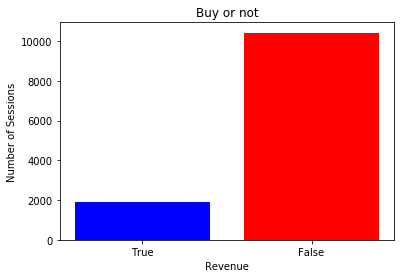

In [10]:
plt.bar([True, False], pur_prob, color = ['r', 'b'], tick_label = ['False', 'True'])
plt.xlabel('Revenue')
plt.title('Buy or not')
plt.ylabel('Number of Sessions')
## We had plotted a bar plot for the sessions which had purchase as an outcome and the sessions which did not had any purchase outcome

Text(0, 0.5, 'Number of Sessions')

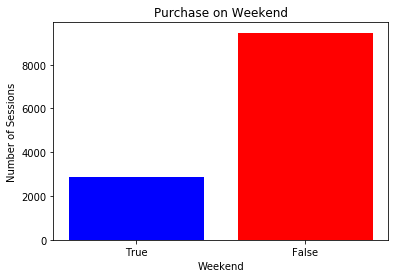

In [15]:
plt.bar(xvalues, pur_week, color = ['r', 'b'], tick_label = ['False', 'True'])
plt.xlabel('Weekend')
plt.title('Purchase on Weekend')
plt.ylabel('Number of Sessions')
## We had plotted a bar plot to show the number of sessions which had a purchase outcome and which did not

In [11]:
Vis_type = data['VisitorType'].value_counts() ## Counting the number of sessions from Returning, New Visitors and Other

In [11]:
Vis_type ## We can see that 10551 sessions came from Returning_Visitor, 1694 came from New_Visitor and 85 from Other
## We were not sure what Other meant but we decided to keep it so that the data quality is not harmed

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

([<matplotlib.patches.Wedge at 0x22ca9a06388>,
 [Text(-0.9889190739305227, 0.481704333815254, 'Returning Visitor'),
  Text(0.978255552488044, -0.5030070317861491, 'New Visitor'),
  Text(1.099742039534667, -0.023821135156215947, 'Other')],
 [Text(-0.5394104039621033, 0.262747818444684, '85.571778%'),
  Text(0.5335939377207511, -0.27436747188335403, '13.738848%'),
  Text(0.5998592942916365, -0.01299334644884506, '0.689375%')])

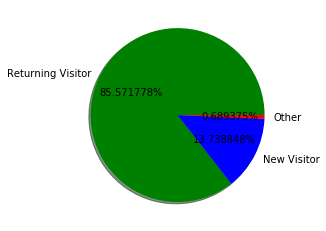

In [12]:
plt.pie(Vis_type, shadow=True, labels = ['Returning Visitor', 'New Visitor', 'Other'], colors = ['g','b','r'], autopct = '%1f%%')
## In the pie plot, we can see the number of sessions coming from Returning visitors, New Visitors and Other

In [13]:
browser = data['Browser'].value_counts()
browser

## We have counted the number of sessions coming from each browser

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

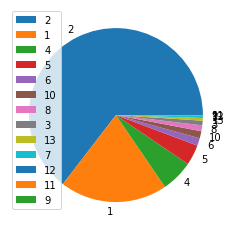

In [14]:
plt.pie(browser, labels = browser.index)
plt.legend(loc = 'best')
## We have plotted a pie chart containing the number of sessions from each browser

In [18]:
month = data['Month'].value_counts()
month.index

Index(['May', 'Nov', 'Mar', 'Dec', 'Oct', 'Sep', 'Aug', 'Jul', 'June', 'Feb'], dtype='object')

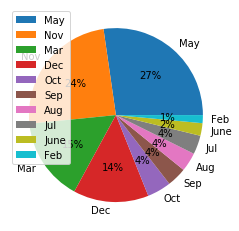

In [19]:
plt.pie(month, labels = month.index, autopct = '%1.0f%%')
plt.legend(loc = 'best')

## We can also see that which month has the number of sessions in this pe chart.

In [17]:
data_1 = data[data['SpecialDay']>0]

In [18]:
data_1m = data.groupby('Month')

In [19]:
data_1m.first()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Month,,,,,,,,,,,,,,,,,
Aug,0.0,0.000000,0.0,0.000000,20.0,419.600000,0.038095,0.068254,0.000000,0.0,3,2,3,3,Returning_Visitor,True,False
Dec,0.0,0.000000,0.0,0.000000,1.0,0.000000,0.200000,0.200000,0.000000,0.0,2,2,2,1,Returning_Visitor,False,False
Feb,0.0,0.000000,0.0,0.000000,1.0,0.000000,0.200000,0.200000,0.000000,0.0,1,1,1,1,Returning_Visitor,False,False
Jul,3.0,152.600000,0.0,0.000000,28.0,608.883333,0.009375,0.031250,19.827709,0.0,2,2,7,13,Returning_Visitor,False,True
June,3.0,40.200000,0.0,0.000000,11.0,201.133333,0.000000,0.020000,0.000000,0.0,2,2,2,1,New_Visitor,False,False
Mar,0.0,0.000000,16.0,1210.397619,5.0,279.857143,0.003175,0.012764,0.000000,0.0,2,2,1,8,Returning_Visitor,False,False
May,0.0,0.000000,0.0,0.000000,15.0,292.694444,0.000000,0.005128,54.980000,0.0,3,2,4,4,Returning_Visitor,False,True
Nov,1.0,39.200000,2.0,120.800000,7.0,80.500000,0.000000,0.010000,0.000000,0.0,3,2,4,2,New_Visitor,True,False
Oct,0.0,0.000000,0.0,0.000000,1.0,207.570248,0.000000,0.007937,0.000000,0.0,2,2,1,5,Returning_Visitor,False,False


In [20]:
data_1m.first()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Month,,,,,,,,,,,,,,,,,
Aug,0.0,0.000000,0.0,0.000000,20.0,419.600000,0.038095,0.068254,0.000000,0.0,3,2,3,3,Returning_Visitor,True,False
Dec,0.0,0.000000,0.0,0.000000,1.0,0.000000,0.200000,0.200000,0.000000,0.0,2,2,2,1,Returning_Visitor,False,False
Feb,0.0,0.000000,0.0,0.000000,1.0,0.000000,0.200000,0.200000,0.000000,0.0,1,1,1,1,Returning_Visitor,False,False
Jul,3.0,152.600000,0.0,0.000000,28.0,608.883333,0.009375,0.031250,19.827709,0.0,2,2,7,13,Returning_Visitor,False,True
June,3.0,40.200000,0.0,0.000000,11.0,201.133333,0.000000,0.020000,0.000000,0.0,2,2,2,1,New_Visitor,False,False
Mar,0.0,0.000000,16.0,1210.397619,5.0,279.857143,0.003175,0.012764,0.000000,0.0,2,2,1,8,Returning_Visitor,False,False
May,0.0,0.000000,0.0,0.000000,15.0,292.694444,0.000000,0.005128,54.980000,0.0,3,2,4,4,Returning_Visitor,False,True
Nov,1.0,39.200000,2.0,120.800000,7.0,80.500000,0.000000,0.010000,0.000000,0.0,3,2,4,2,New_Visitor,True,False
Oct,0.0,0.000000,0.0,0.000000,1.0,207.570248,0.000000,0.007937,0.000000,0.0,2,2,1,5,Returning_Visitor,False,False


In [21]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [27]:
plt.style.use('seaborn-colorblind')

Text(0, 0.5, 'Exit Rates')

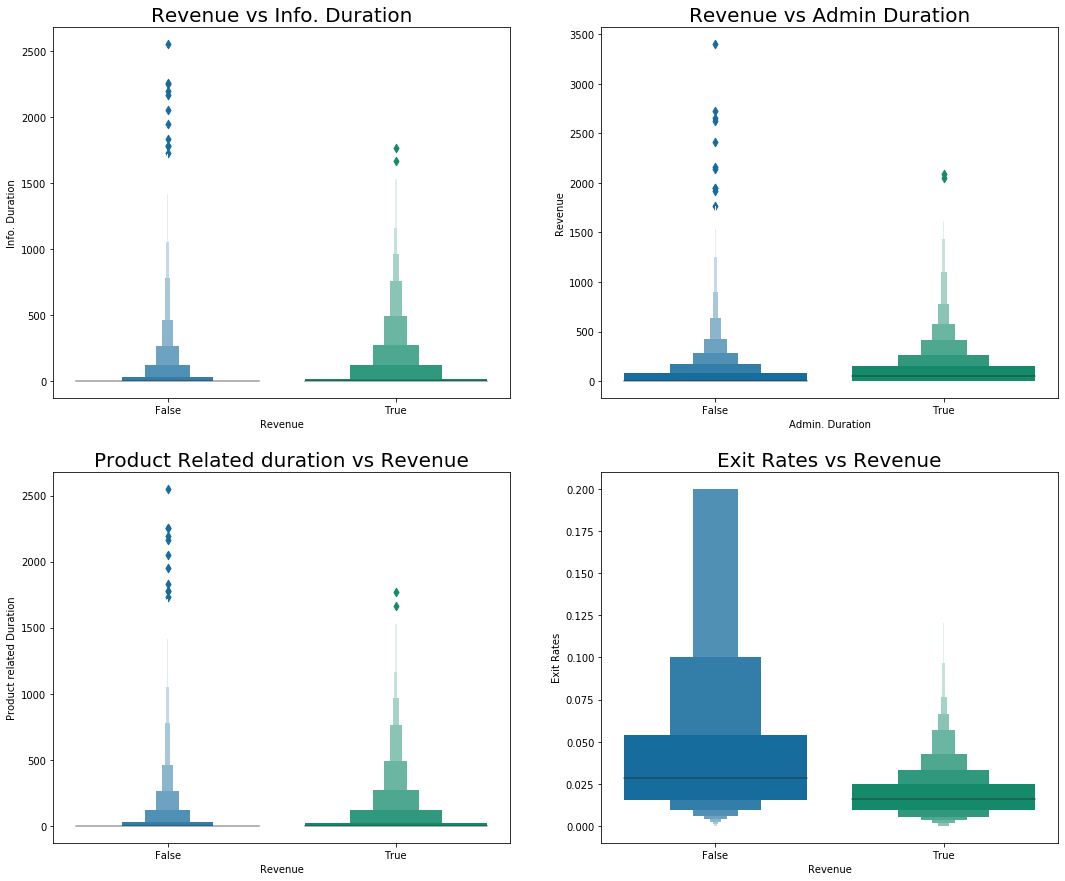

In [39]:
plt.rcParams['figure.figsize'] = (18, 15)

## In this group of plot, we have done bi-variate analysis. 
## There are 4 plots which are Revenue vs Informational Duration, Revenue vs Administrative Duration
## Revenue vs Product Related Duration and Revenue vs Exit Rates

plt.subplot(2,2,1)
sn.boxenplot(data['Revenue'], data['Informational_Duration'])
plt.title('Revenue vs Info. Duration', fontsize = 20)
plt.xlabel('Revenue', fontsize = 10)
plt.ylabel('Info. Duration', fontsize = 10)

plt.subplot(2,2,2)
sn.boxenplot(data['Revenue'], data['Administrative_Duration'])
plt.title('Revenue vs Admin Duration', fontsize = 20)
plt.xlabel('Admin. Duration', fontsize = 10)
plt.ylabel('Revenue', fontsize = 10)

plt.subplot(2,2,3)
sn.boxenplot(data['Revenue'], data['ProducRelated_Duration'])
plt.title('Product Related duration vs Revenue', fontsize = 20)
plt.xlabel('Revenue', fontsize = 10)
plt.ylabel('Product related Duration', fontsize = 10)

plt.subplot(2,2,4)
sn.boxenplot(data['Revenue'], data['ExitRates'])
plt.title('Exit Rates vs Revenue', fontsize = 20)
plt.xlabel('Revenue', fontsize = 10)
plt.ylabel('Exit Rates', fontsize = 10)

Text(0, 0.5, 'Bounce rates')

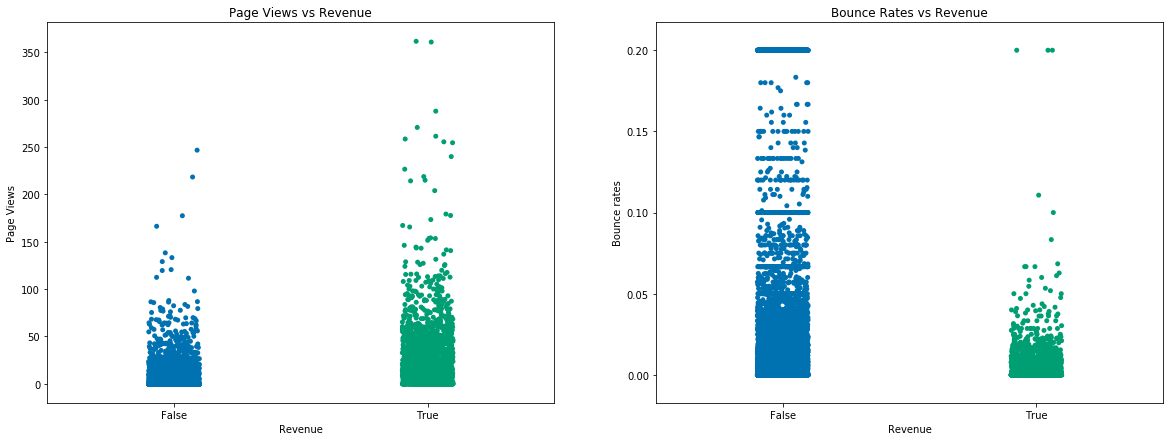

In [41]:
plt.rcParams['figure.figsize'] = (20, 7)

## In this group of plots we have done bi-variate plotting. 
## There are 2 plots which are Page Views vs Revenue and Bounce Rates vs Revenue

plt.subplot(1,2,1) 
sn.stripplot(data['Revenue'], data['PageValues'])
plt.title('Page Views vs Revenue')
plt.xlabel('Revenue')
plt.ylabel('Page Views')

plt.subplot(1,2,2)
sn.stripplot(data['Revenue'], data['BounceRates'])
plt.title('Bounce Rates vs Revenue')
plt.xlabel('Revenue')
plt.ylabel('Bounce rates')

In [43]:
df = pd.crosstab(data['VisitorType'], data['Revenue'])

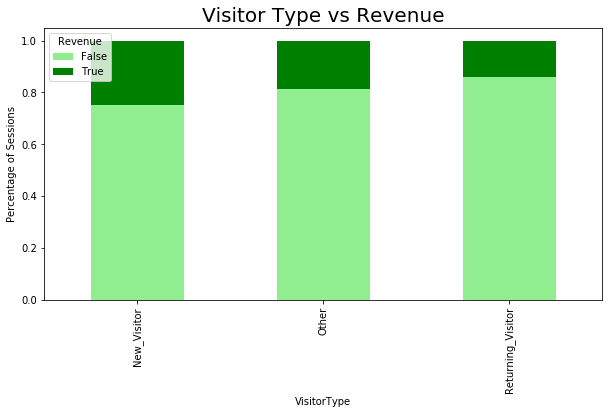

In [44]:
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 5), color = ['lightgreen', 'green'])
plt.title('Visitor Type vs Revenue', fontsize = 20)
plt.ylabel('Percentage of Sessions')
plt.show()

## The plot shows the three Visitor Types and the number of sessions they have purchansed and number of sessions in which they did not purchased

Text(0.5, 1.0, 'Visitors vs Bounce Rates w.r.t Revenue')

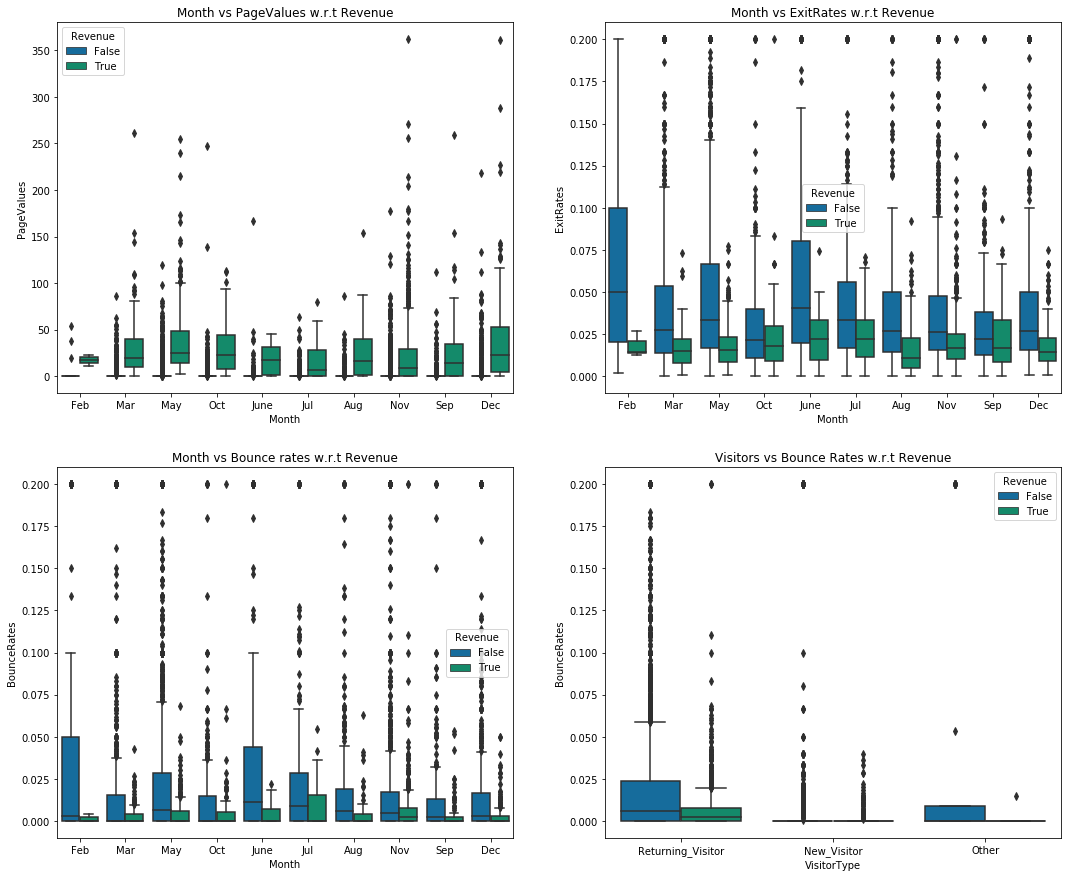

In [27]:
plt.rcParams['figure.figsize'] = (18, 15)

## In this group of plots, we have done tri-variate plotting taking 3 variables for plotting. 
## There are 4 plots
## The 1st plot is Month vs Page Views w.r.t to purchase or not purchase
## The 2nd plot is Month vs Exit Rates w.r.t to purchase or not purchase
## The 3rd plot is Month vs Bounce Rates w.r.t to purchase or not purchase
## The 4th plot is Visitor Types vs Bounce Rates w.r.t. to purchase or not purchase

plt.subplot(2,2,1)
sn.boxplot(x = data['Month'], y = data['PageValues'], hue = data['Revenue'])
plt.title('Page Views vs Month w.r.t Revenue')

plt.subplot(2,2,2)
sn.boxplot(x = data['Month'], y = data['ExitRates'], hue = data['Revenue'])
plt.title('Exit Rates vs Month w.r.t Revenue')

plt.subplot(2,2,3)
sn.boxplot(x = data['Month'], y = data['BounceRates'], hue = data['Revenue'])
plt.title('Bounce rate vs Month w.r.t Revenue')

plt.subplot(2,2,4)
sn.boxplot(x = data['VisitorType'], y = data['BounceRates'], hue = data['Revenue'])
plt.title('Bounce rates vs Visitors w.r.t Revenue')

Text(0.5, 1.0, 'Region vs Exit Rates w.r.t Revenue')

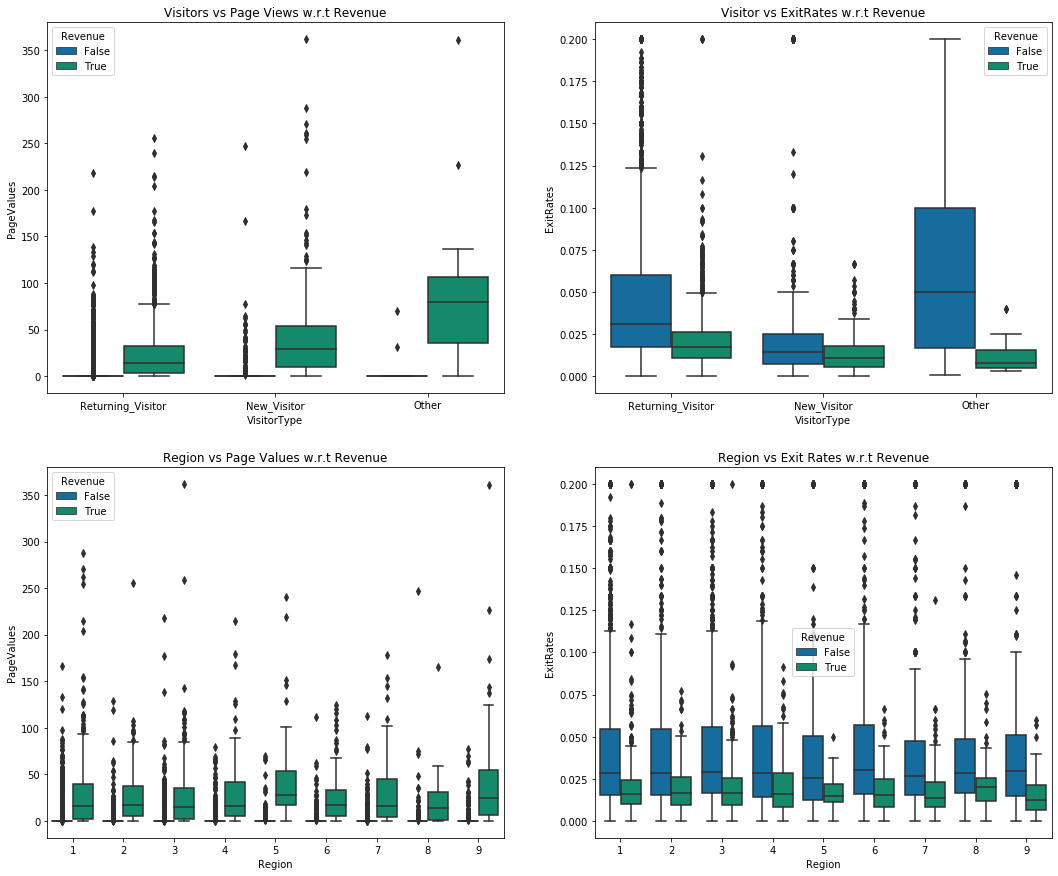

In [45]:
plt.rcParams['figure.figsize'] = (18, 15)

## In this group of plots, we have done tri-variate plotting taking 3 variables for plotting. 
## There are 4 plots
## The 1st plot is Visitor Type vs Page Views w.r.t to purchase or not purchase
## The 2nd plot is Visitor Type vs Exit Rates w.r.t to purchase or not purchase
## The 3rd plot is Region vs Page Views w.r.t to purchase or not purchase
## The 4th plot is Region vs Exit Rates w.r.t. to purchase or not purchase

plt.subplot(2,2,1)
sn.boxplot(x = data['VisitorType'], y = data['PageValues'], hue = data['Revenue'])
plt.title('Visitors vs Page Views w.r.t Revenue')

plt.subplot(2,2,2)
sn.boxplot(x = data['VisitorType'], y = data['ExitRates'], hue = data['Revenue'])
plt.title('Visitor vs ExitRates w.r.t Revenue')

plt.subplot(2,2,3)
sn.boxplot(x = data['Region'], y = data['PageValues'], hue = data['Revenue'])
plt.title('Region vs Page Values w.r.t Revenue')

plt.subplot(2,2,4)
sn.boxplot(x = data['Region'], y = data['ExitRates'], hue = data['Revenue'])
plt.title('Region vs Exit Rates w.r.t Revenue')

In [29]:
data1 = pd.get_dummies(data)

In [30]:
data1.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [31]:
data1.fillna(0,inplace = True)
data1.to_excel('datafinal.xlsx')
## Here we have exported the data from python to excel in order to do analysis in R Studio

In [32]:
data.fillna(0, inplace=True)
data.to_excel('DataFinal1.xlsx')
## Here we have exported the data from python to excel in order to do analysis in R Studio

In [33]:
x = data1.iloc[:,[13,14]].values

In [34]:
x = data1.drop('Revenue', axis=1)

y = data1['Revenue']

x
y

x.to_excel('predictor.xlsx')
y.to_excel('target.xlsx')
## Here we have exported the data from python to excel in order to do analysis in R Studio

In [ ]:
df3 = data[data['Revenue'] == True]

In [ ]:
df = data[data['Revenue'] == False]

In [ ]:
df2 = df[0:1908].shape

In [ ]:
data_final = pd.concat([df3,df2], axis=0, ignore_index = True)

In [ ]:
data_final
data_final.to_excel('datatreat.xlsx')
## Here we have exported the data from python to excel in order to do analysis in R Studio

(12330, 18)